### CRISP-DM Method
- Business Understanding
- Data Understanding
- Data Preparation
- Model Building
- Model Evaluation
- Model Deployment

# 1. Business Understanding
- Forecasting future transaction, predicting the value of each account in the future
- Likelihood regression
- Data for 3 years
- Advised data quality is okay

# 2. Data Understanding

In [98]:
import pandas as pd
df = pd.read_csv("regression.csv")

In [99]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


At the first look at the data's head, it's clear that the target column is going to be "Amount", and the feature columns are the rest.

In [100]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


Looking at the data's tail, we can see that there are bunch of different types of accounts. We also have date until 2021 which is consistent with 3 years of data. 

In [101]:
# A good check to evaluate the data is to see if there is any missing value.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


It looks like there is no missing value in all features.

In [102]:
# Another good check that we can perform is check the uniqueness of the values within the columns.   
# This give us a feel of how many different types of categories we're going to have within our data. 
# We can do that using a quick loop though the dataframe columns.

df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [103]:
# We can also check the uniqueness of the values within each column. 

for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


We've printed out the name of each column, the number of unique values within that column, and the unique values within that column.

We might convert the 'Month' column to a datetime object/numeric objects.

Besides, the 'Account' and 'Account description' columns have the same number of unique valuess. This possibly means that they provide the same information so that we can drop one of them.

In [104]:
# Another good look is to check the spread of the data by creating some summary statistics using the describe() function.

df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


The table above only shows the summary statistics for the numerical columns including the 'Year', 'Account' and 'Amount' column, excluding the 'Month', 'Cost Centre', 'Account Type', and 'Account description' column.

We only need to care about the statistics for the 'Amount' column since the 'Year' and 'Account' column are just categorical values.

Until now, we just looked at the data through tables and numbers. But the easiest way to feel the data is through graphs, which we will cover in the next section using matplotlib and seaborn libraries.

## Visualizations

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns

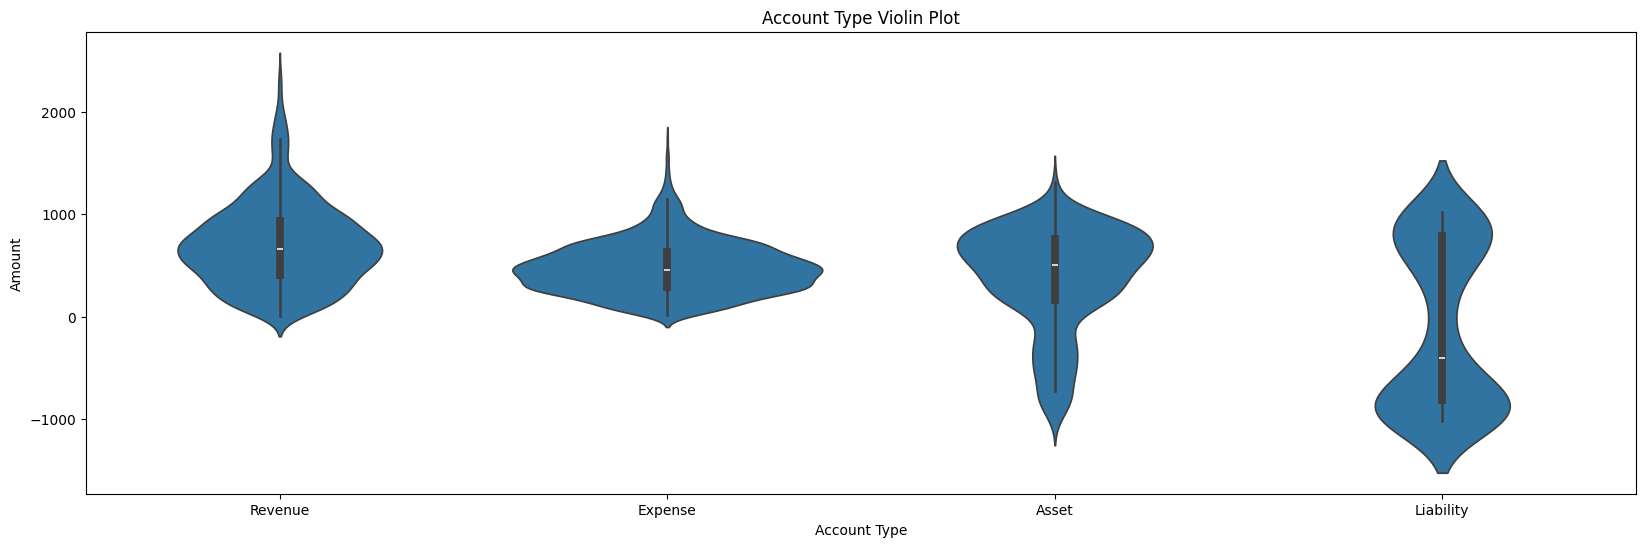

In [106]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df).set_title("Account Type Violin Plot")
plt.show()

Take a look at the violin plot, we can see that the Revenue accounts tend to sort of average out of 800 to 900 dollars, similar to the Asset accounts. The Expenses accounts tend to sort of average out of 500 to 500 dollars. And lastly, the Liability accounts have a big spread of values around 900 to -900 dollars.

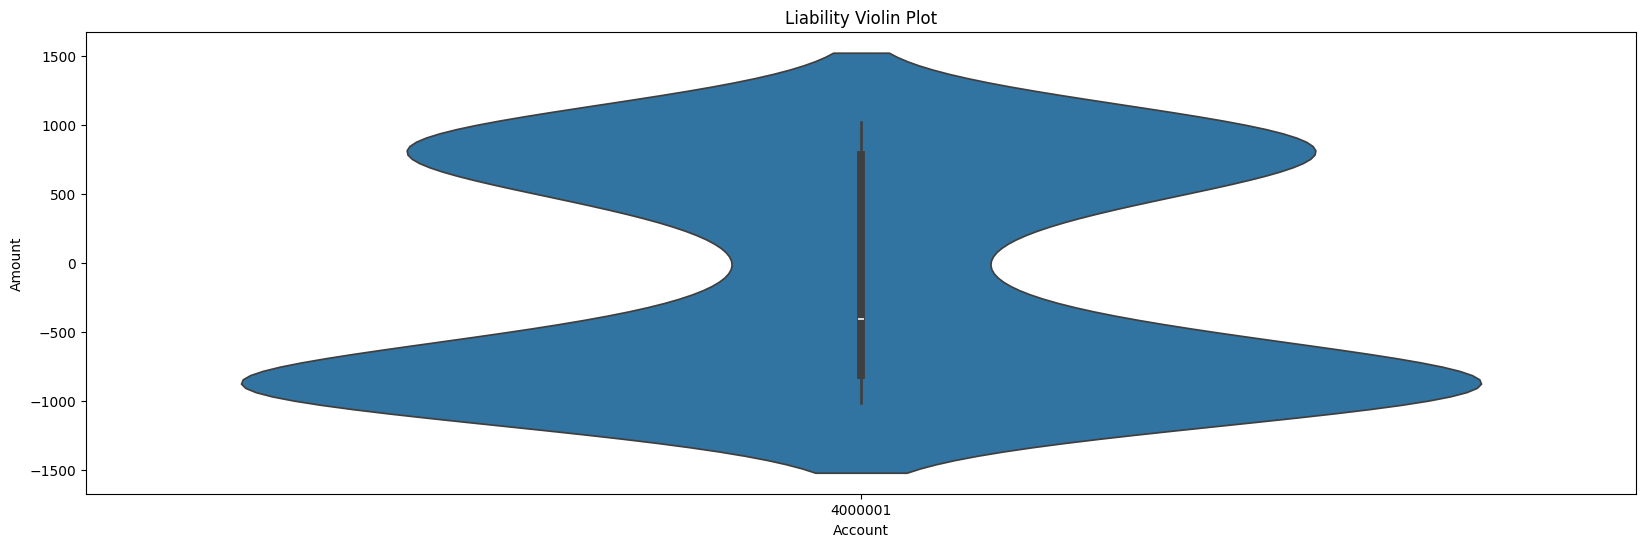

In [107]:
# Now we will interrogate  the Liability accounts more since it's the furthest from a a normal distribution.

plt.figure(figsize=(20,6))
sns.violinplot(x="Account", y="Amount", data=df[df["Account Type"] == "Liability"]).set_title("Liability Violin Plot")
plt.show()

The Liability accounts have a big spread of values around 900 to -900 dollars, we might choose to perform some data transformation to normalize the data.

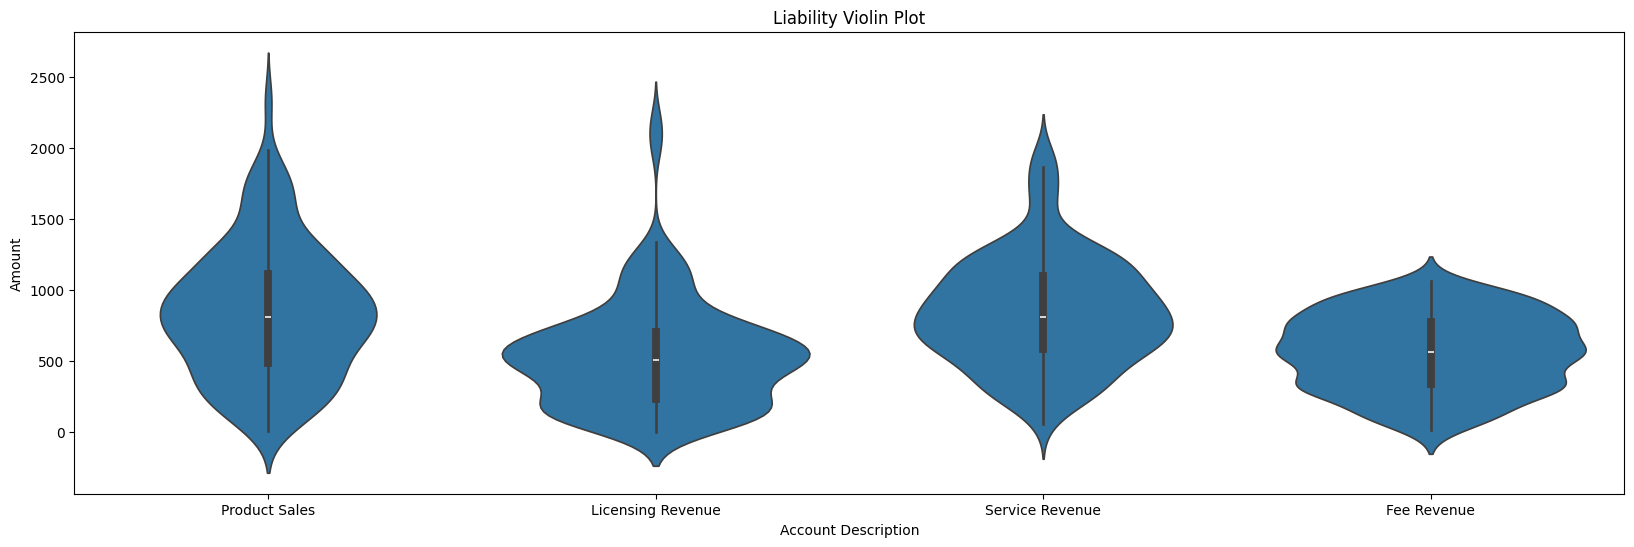

In [108]:
# Let's take a look at the distribution of the Revenue accounts. 

plt.figure(figsize=(20,6))
sns.violinplot(x="Account Description", y="Amount", data=df[df["Account Type"] == "Revenue"]).set_title("Liability Violin Plot")
plt.show()

## Review trends

In [109]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


Now we will need to convert the 'Month' and 'Year' column to a datetime object.

In [110]:
monthmap = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}

In [111]:
monthmap["Jan"]

1

In [112]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [113]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [114]:
# Check other months
df[df["Month"] == "Feb"].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
117,2019,Feb,CC100,1000000,Product Sales,Revenue,919.749,2
118,2019,Feb,CC100,1000001,Licensing Revenue,Revenue,398.591,2
119,2019,Feb,CC100,1000002,Service Revenue,Revenue,1091.767,2
120,2019,Feb,CC100,1000004,Fee Revenue,Revenue,489.903,2
121,2019,Feb,CC100,2000000,Cost of Good Sold,Expense,448.411,2


In [115]:
# Create another column for the days
df['Day'] = 1

In [116]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [117]:
# Create a date column
df['Date'] = df['Year'].astype(str) + "-" + df['Period'].astype(str) + "-" + df['Day'].astype(str)
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [118]:
# Check the type of the Date column's data
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

As we can see, the Date column is of type object. We need to convert it to a datetime object.

In [119]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

Our Date column is now of type datetime.

Text(0.5, 1.0, 'Seasonal Revenue')

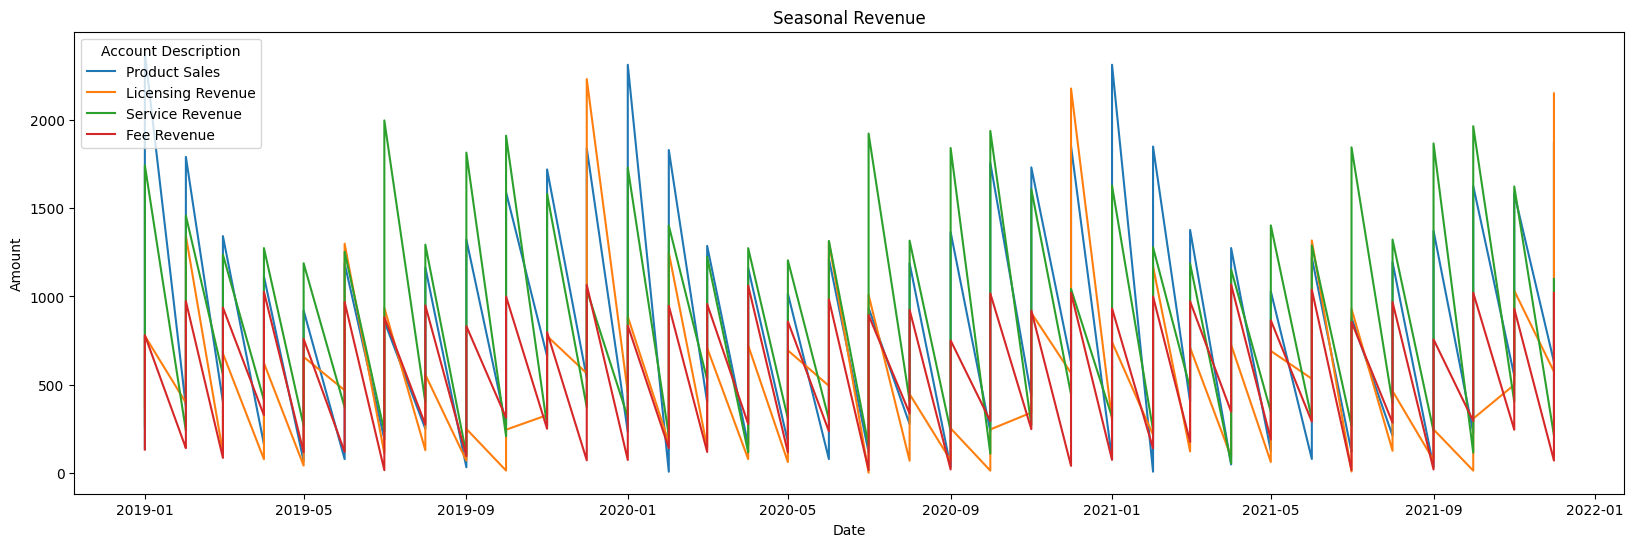

In [120]:
# All the data transformation is done. Now we can visualize the data more clearly with a time series plot.
# Let first start with the Revenue accounts since it's the most seasonal account with almost all businesses.

plt.figure(figsize=(20,6))
sns.lineplot(x="Date", y="Amount", hue="Account Description", estimator=None, data=df[df["Account Type"] == "Revenue"]).set_title("Seasonal Revenue")

The graph above is a high level time series plot of the Revenue accounts. It seems like the data is seasonal with up and down trends. But the graph looks a bit messy with 4 different types of accounts. 

Text(0.5, 1.0, 'Seasonal Revenue')

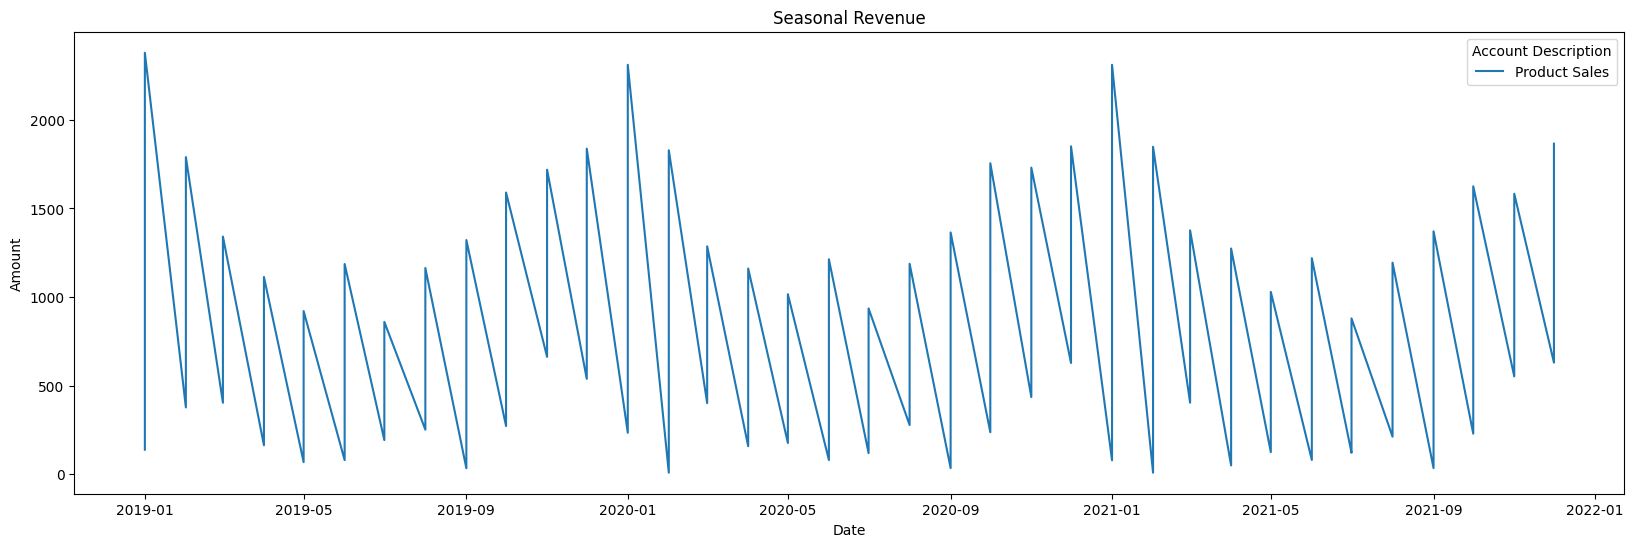

In [121]:
# Now let's look at the Product Sales accounts solely.

plt.figure(figsize=(20,6))
sns.lineplot(x="Date", y="Amount", hue="Account Description", estimator=None, data=df[df["Account Description"] == "Product Sales"]).set_title("Seasonal Revenue")

The graph starts with a high peak in Jan, gradualy decreases to lowest in the middle of the year and then starts to increase again until the end of the year and reach peak again in Jan next year.

There is a clear seasonal pattern in the data with regular peaks and troughs within each year. This suggests that product sales have a predictable seasonal component.

Text(0.5, 1.0, 'Seasonal Revenue')

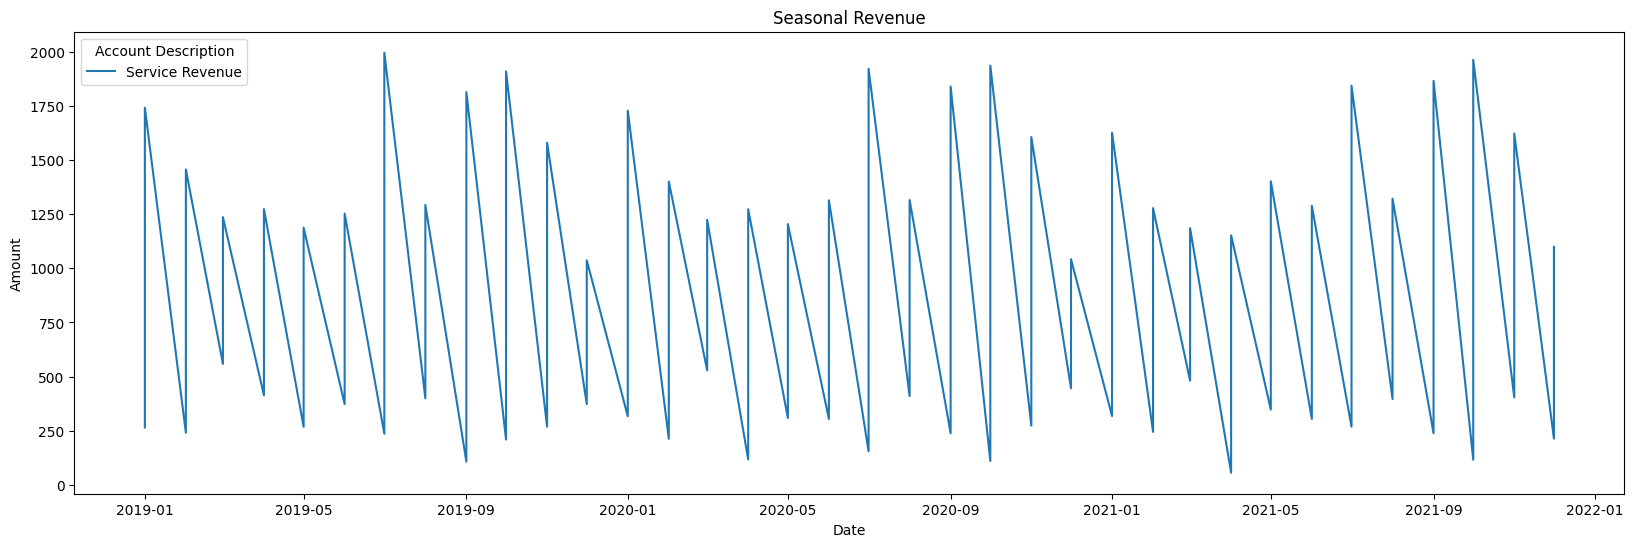

In [122]:
# Let's look at the Service Revenue accounts.

plt.figure(figsize=(20,6))
sns.lineplot(x="Date", y="Amount", hue="Account Description", estimator=None, data=df[df["Account Description"] == "Service Revenue"]).set_title("Seasonal Revenue")

It looks like the Service Revenue accounts are the not seasonal as the Product Sales accounts. Perhapps it's a consulting service, the Service revenues are attacched to the number of chargeable days/hours in a month.

## Correlations

In [123]:
df.corr()

ValueError: could not convert string to float: 'Jan'

In [ ]:
# We will wanna look at the correlation between the accounts (i.e the Service Revenue and the Staff Expenses)
# Let's look if we have a Staff Expenses account.

df["Account Description"].unique() 

We can see that there is a Staff Expenses Account.

In [ ]:
# Create a number of column per each account.
pd.get_dummies(df["Account"])

In [ ]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df["Account"])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [68]:
corrdf.corr()

,0,1,2,3,4,5,6,7,8,9,...,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211
0,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,-0.083333,0.083333
1,-0.083333,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,-0.083333,0.083333
2,-0.083333,-0.083333,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,-0.083333,0.083333
3,-0.083333,-0.083333,-0.083333,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,-0.083333,0.083333
4,-0.083333,-0.083333,-0.083333,-0.083333,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,1.000000,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,-0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,1.000000,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,1.000000,0.083333,-0.083333,-0.083333,0.083333
4208,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,-1.000000,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,1.000000,0.083333,0.083333,-0.083333
4209,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,1.000000,-0.083333,0.083333
4210,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,...,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.083333,-0.083333,1.000000,0.083333


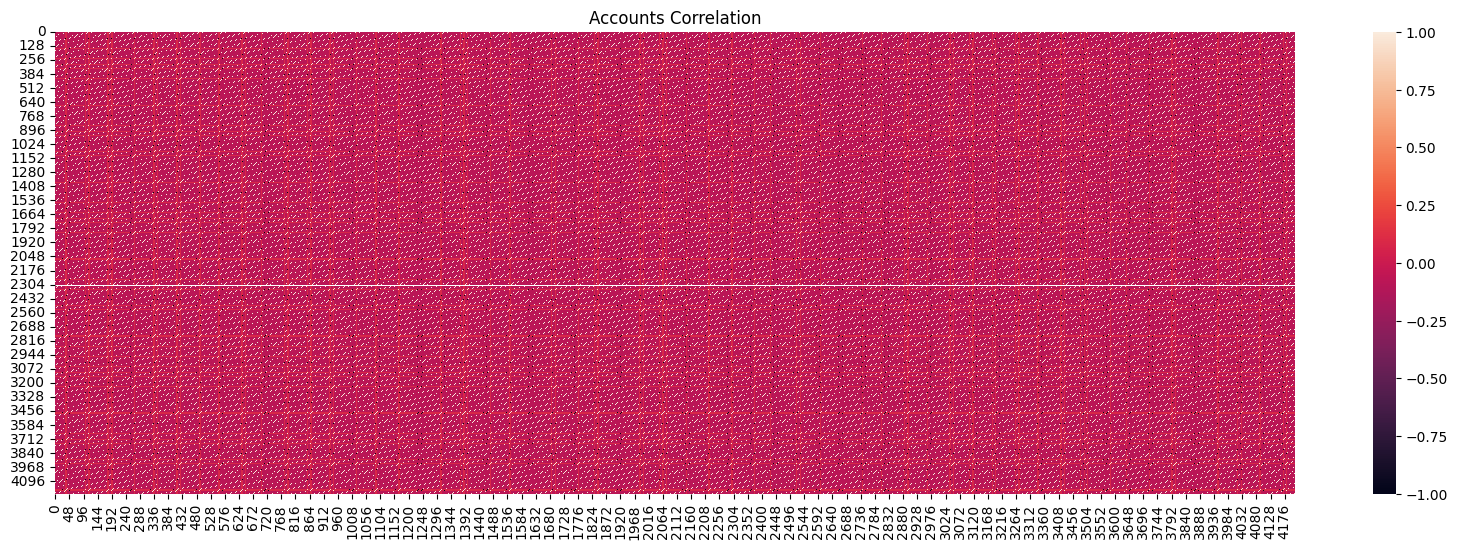

In [97]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title("Accounts Correlation")
plt.show()

# 3. Data Preparation

In [ ]:
# Testing

# 4. Model Building

# 5. Model Evaluation

# 6. Model Deployment